In [61]:
# In this notebook I am going to build the Binary Classification model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from functions import *

In [62]:
# Read the data
data_lakes_mean = pd.read_csv("out\processed_data_lakes_mean.csv", encoding = 'cp1252')
data_lakes_mean.head()

,STN\nCode,Name of Monitoring Location,Type Water Body,State Name,TemperatureC_mean,Dissolved Oxygen_mg/L_mean,pH_mean,Conductivity_mhos/cm_mean,BOD_mg/L_mean,Nitrate_N_mg/L_mean,Fecal_Coliform_MPN/100ml_mean,Total_Coliform_MPN/100ml_mean
0,4368,"KOLLERU LAKE KOKKIRAYALANKA (V), KAILALUR (M)",LAKE,ANDHRA PRADESH,25.5,4.85,7.50,2702.5,2.40,2.310,15.0,165.0
1,2353,"KONDAKARLA-AAVA LAKE, PARAWADA PHARMA CITY, VI...",LAKE,ANDHRA PRADESH,27.5,4.90,7.35,889.0,3.25,2.165,19.0,195.0
2,1790,"PULICATE LAKE , NELLORE DIST",LAKE,ANDHRA PRADESH,21.0,5.10,7.70,42450.0,2.60,1.420,3.0,98.5
3,4391,"CHENGAMBAKAM TANK IN SRI CITY SEZ,\nTIRUPATHI",TANK,ANDHRA PRADESH,25.5,5.80,7.10,328.0,1.75,1.320,194.5,359.5
4,4921,ANNAMAYYA PROJECT ON CHEYYERU\nRESERVOIR,Wetland,ANDHRA PRADESH,25.5,5.95,7.65,615.0,1.65,0.675,166.0,483.5


In [63]:
# Data info
data_lakes_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   STN
Code                       542 non-null    int64  
 1   Name of Monitoring Location    542 non-null    object 
 2   Type Water Body                542 non-null    object 
 3   State Name                     542 non-null    object 
 4   TemperatureC_mean              542 non-null    float64
 5   Dissolved Oxygen_mg/L_mean     542 non-null    float64
 6   pH_mean                        542 non-null    float64
 7   Conductivity_mhos/cm_mean      542 non-null    float64
 8   BOD_mg/L_mean                  542 non-null    float64
 9   Nitrate_N_mg/L_mean            542 non-null    float64
 10  Fecal_Coliform_MPN/100ml_mean  542 non-null    float64
 11  Total_Coliform_MPN/100ml_mean  542 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 5

In [64]:
#Become ph to binary (acid = 1 = ph < 7.25 and base = 0 = ph > 7.25)
data_lakes_mean.loc[data_lakes_mean["pH_mean"] <= 7.25 , "pH_mean"] = 1
data_lakes_mean.loc[data_lakes_mean["pH_mean"] > 7.25 , "pH_mean"] = 0
data_lakes_mean["pH_mean"]=data_lakes_mean["pH_mean"].astype("int64")
data_lakes_mean.head(15)


,STN\nCode,Name of Monitoring Location,Type Water Body,State Name,TemperatureC_mean,Dissolved Oxygen_mg/L_mean,pH_mean,Conductivity_mhos/cm_mean,BOD_mg/L_mean,Nitrate_N_mg/L_mean,Fecal_Coliform_MPN/100ml_mean,Total_Coliform_MPN/100ml_mean
0,4368,"KOLLERU LAKE KOKKIRAYALANKA (V), KAILALUR (M)",LAKE,ANDHRA PRADESH,25.5,4.85,0,2702.5,2.40,2.310,15.0,165.0
1,2353,"KONDAKARLA-AAVA LAKE, PARAWADA PHARMA CITY, VI...",LAKE,ANDHRA PRADESH,27.5,4.90,0,889.0,3.25,2.165,19.0,195.0
2,1790,"PULICATE LAKE , NELLORE DIST",LAKE,ANDHRA PRADESH,21.0,5.10,0,42450.0,2.60,1.420,3.0,98.5
3,4391,"CHENGAMBAKAM TANK IN SRI CITY SEZ,\nTIRUPATHI",TANK,ANDHRA PRADESH,25.5,5.80,1,328.0,1.75,1.320,194.5,359.5
4,4921,ANNAMAYYA PROJECT ON CHEYYERU\nRESERVOIR,Wetland,ANDHRA PRADESH,25.5,5.95,0,615.0,1.65,0.675,166.0,483.5
5,4936,ANUMANAPALLE CHERUVU,Wetland,ANDHRA PRADESH,22.5,7.15,0,239.0,1.70,1.105,3.5,106.5
6,4919,BRAMHASAGAR,Wetland,ANDHRA PRADESH,24.5,5.75,0,494.5,1.60,0.495,183.5,406.0
7,4926,DALI TANK,Wetland,ANDHRA PRADESH,26.5,5.75,0,9612.0,2.00,1.600,9.5,76.0
8,4931,GACCHAKAYALA PORA (LAGOON),Wetland,ANDHRA PRADESH,29.0,5.85,0,34565.0,2.50,1.745,9.5,92.0
9,4917,GANGINENI CHERUVU,Wetland,ANDHRA PRADESH,25.5,4.80,0,1064.0,2.85,2.795,425.0,830.0


In [65]:
# Data info 2.0
data_lakes_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   STN
Code                       542 non-null    int64  
 1   Name of Monitoring Location    542 non-null    object 
 2   Type Water Body                542 non-null    object 
 3   State Name                     542 non-null    object 
 4   TemperatureC_mean              542 non-null    float64
 5   Dissolved Oxygen_mg/L_mean     542 non-null    float64
 6   pH_mean                        542 non-null    int64  
 7   Conductivity_mhos/cm_mean      542 non-null    float64
 8   BOD_mg/L_mean                  542 non-null    float64
 9   Nitrate_N_mg/L_mean            542 non-null    float64
 10  Fecal_Coliform_MPN/100ml_mean  542 non-null    float64
 11  Total_Coliform_MPN/100ml_mean  542 non-null    float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5

In [66]:
# Are the clases unbalanced?
data_lakes_mean.groupby("pH_mean").size()
# The class 1 (acid) = 28.9%, whereas the class 0 (base) = 71.9%


pH_mean
0    385
1    157
dtype: int64

In [67]:
# Split in features and labels
X = data_lakes_mean.drop(["pH_mean"], axis=1)
X = data_lakes_mean.iloc[:,4:].values # Values important as a way to get ready the inputs for the model
y = data_lakes_mean["pH_mean"].values

In [68]:
#Under sampling the dataset
from imblearn.combine import SMOTEENN
sample = SMOTEENN(sampling_strategy=0.95)
X_bal, y_bal = sample.fit_resample(X,y)
print(y_bal)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


In [69]:
# New dataset
y_bal = pd.DataFrame(y_bal)
y_bal.columns = ['pH_mean']
y_bal.groupby("pH_mean").size()
# The new class 1 (acid) = 48.4%, whereas the class 0 (base) = 51.5%
# Be careful when you are under or over sampling the dataset, because this behavior could be the real behavior in our dataset.

pH_mean
0    214
1    201
dtype: int64

In [70]:
# First I need to split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size = 0.2, random_state = 0)


In [75]:
# Split Train between train and validate / 83 is the 20% of the balanced dataset
X_val = X_train[:83]
partial_x_train = X_train[83:]

y_val = y_train[:83]
partial_y_train = y_train[83:]

In [76]:
# I dont normalize due to binary, but I need apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3) # parametro opcional de numero de componentes
pca.fit(partial_x_train) # aplicad aa datos de entrenamiento


PCA(n_components=3)

In [78]:
# Number of information that contributes each component
pca.explained_variance_ratio_ 

array([9.65613512e-01, 3.43864880e-02, 7.52500160e-11])

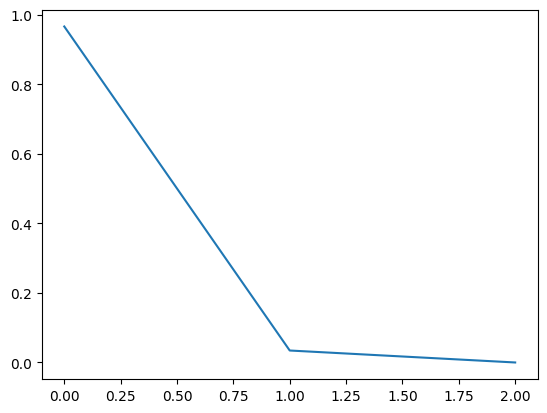

In [77]:
# Understand the number of sufficient components
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()

In [79]:
# Apply the PCA to all our X features
dt_train = pca.transform(partial_x_train)
dt_test = pca.transform(X_test)
dt_vali = pca.transform(X_val)

In [82]:
# Binary classification model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(dt_train, partial_y_train)
y_pred = logreg.predict(dt_test)

d:\Barba\Business\Datascientist\41Projects\lakes_project\venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
